In [2]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt

In [11]:
datafolder = "/home/hlane/gizmo-public/custom/gmc_MHD000/output" #Define variable
mSystemList = []
mGasList = []
mStarList = []
mStarTotalList = [] 
timeList = []
massAvgList = []
gravEPotList = []
keList = []
alphaList = []
massList = []
gpotList = []
#Gathers initial gass mass for SFE
sfeList = []
f = h5py.File(datafolder + "/snapshot_000.hdf5", "r")  #opens file
mgasInit = np.sum(np.float64(np.array(f["PartType0"]["Masses"]))) #MassGas in snapshot 1
#Gathers masses of all stars for all snapshots
for i in range(120,750):
    ext='00'+str(i);
    if (i>=10): ext='0'+str(i)                                     #This resolves naming issues
    if (i>=100): ext=str(i)
    f = h5py.File(datafolder + "/snapshot_" + ext + ".hdf5", "r")  #opens file
    try:
        mStar = np.float64(np.array(f["PartType5"]["Masses"]))     #reads file
    except: 
        mStar = 0                 #If there are no stars, the mass is zero.
    try:
        vStar =  np.float64(np.array(f["PartType5"]["Velocities"]))
    except: 
        vStar = 0
    try:
        gpotStar = np.float64(np.array(f["PartType5"]["Potential"]))
    except:
        gpotGas = 0
    finally:
        mGas = np.float64(np.array(f["PartType0"]["Masses"]))
        vGas = np.float64(np.array(f["PartType0"]["Velocities"]))
        gpotGas = np.float64(np.array(f["PartType0"]["Potential"]))

    f.close()                                                      #closes the file
    
    time = load_from_snapshot.load_from_snapshot("Time",0,datafolder,i) #gathers time info for each snapshot
    timeList.append(time)                             #adds the times to the list
    
    mStartotal = np.sum(mStar)                            #mass of all stars
    mStarTotalList.append(mStartotal)                       #adds the total mass of all stars to a list
    sfeList.append(mStartotal/mgasInit)                   #SFE equation, mass of all stars divided by mass of initial gas
    
    mGasList.append(mGas)
    mStarList.append(mStar)
    
    massList = np.concatenate((mGas, mStar))
    velocities = np.concatenate((vGas, vStar))
    gpotList = np.concatenate((gpotGas, gpotStar))
    
    massAvg = np.mean(mStar)                          #mean mass of all stars
    massAvgList.append(massAvg)                       #adds average mass to the list
    
    gravEPot = np.sum(0.5* massList * gpotList)              #Calculating gravitational potential energy
    gravEPotList.append((gravEPot))                   #adds gravitational potential energy to list
    

    kineticEnergy = np.sum(0.5 * (massList[:,None]) * (velocities ** 2)) #calculates kinetic energy of the system
    keList.append(kineticEnergy)
    
                       #adds gravitational potential to list
    
    alpha = 2 * kineticEnergy / np.abs(gravEPot)              #Calculates alpha
    alphaList.append(alpha)

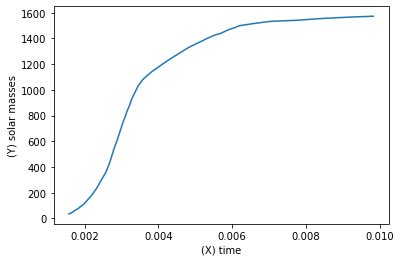

In [12]:
#Total mass as a function of time of stars
mStarTotalList = np.array(mStarTotalList) #array is a list of identical things, much more structured
timeList = np.array(timeList) #offers more options as lists can be anything.
plt.plot(timeList,mStarTotalList)   #x,y values of the lists for plotting.
plt.xlabel('(X) time') #x label
plt.ylabel('(Y) solar masses') #y label
plt.show()

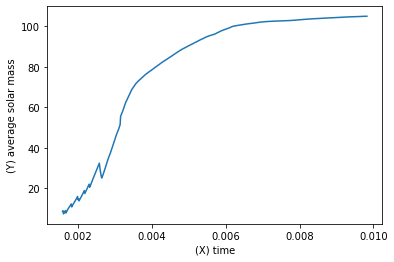

In [13]:
#Average mass of a star as a function of time.
mStarTotalList = np.array(massAvgList) #array is a list of identical things, much more structured
timeList = np.array(timeList) #offers more options as lists can be anything.
plt.plot(timeList,mStarTotalList)   #x,y values of the lists for plotting.
plt.xlabel('(X) time') #x label
plt.ylabel('(Y) average solar mass') #y label
plt.show()

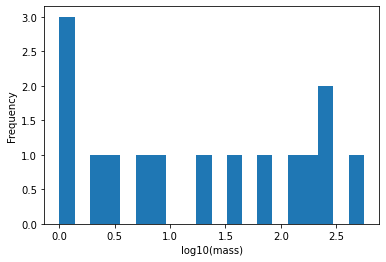

In [14]:
#This finds the distribution of star masses in a particular snapshot.
massLogList = []
#num = load_from_snapshot.load_from_snapshot("ParticleIDs",5,datafolder,750)
f = h5py.File(datafolder + "/snapshot_750.hdf5", "r")  #opens file
try:
    mStar = np.float64(np.array(f["PartType5"]["Masses"])) #reads file
except: 
    mStar = 0
mStartotal = np.sum(mStar)
mlog = (np.log10(mStar))
f.close()                                         #closes the file
massLogList.append(mlog)
#This graphs that distribution
mStarTotalList = np.array(massLogList)
plt.hist(mlog, bins = 20)
plt.xlabel('log10(mass)') 
plt.ylabel('Frequency') 
plt.show()

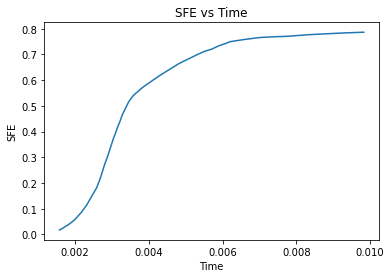

In [15]:
plt.title("SFE vs Time") #(Star formation efficiency) mass of stars divided by mass of initial gas.

sfeList = np.array(sfeList) #array is a list of identical things, much more structured
timeList = np.array(timeList) #offers more options as lists can be anything.
plt.plot(timeList,sfeList)   #x,y values of the lists for plotting.
plt.xlabel('Time') #x label
plt.ylabel('SFE') #y label
#plt.ylim(0,1)
plt.show()

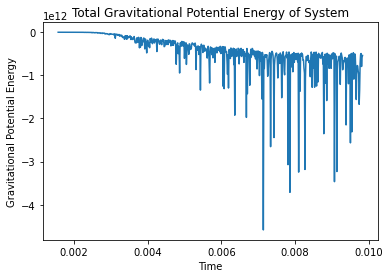

In [16]:
plt.title("Total Gravitational Potential Energy of System")
#Total mass as a function of time
gravEPotList = np.array(gravEPotList) #array is a list of identical things, much more structured
timeList = np.array(timeList) #offers more options as lists can be anything.
plt.plot(timeList,gravEPotList)   #x,y values of the lists for plotting.
plt.xlabel('Time') #x label
plt.ylabel('Gravitational Potential Energy') #y label
plt.show()

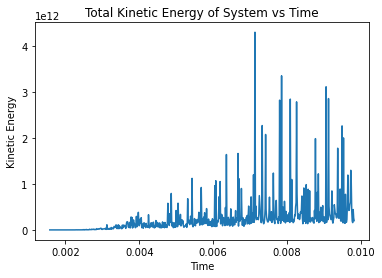

In [19]:
plt.title("Total Kinetic Energy of System vs Time")
keList = np.array(keList) #array is a list of identical things, much more structured
timeList = np.array(timeList) #offers more options as lists can be anything.
plt.plot(timeList,keList)   #x,y values of the lists for plotting.
plt.xlabel('Time') #x label
plt.ylabel('Kinetic Energy') #y label
plt.show()


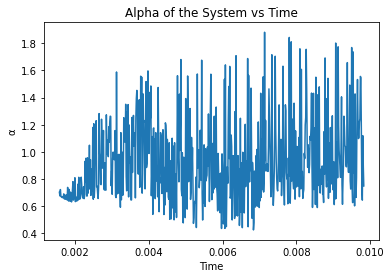

In [21]:
plt.title("Alpha of the System vs Time")
alphaList = np.array(alphaList) #array is a list of identical things, much more structured
timeList = np.array(timeList) #offers more options as lists can be anything.
plt.plot(timeList,alphaList)   #x,y values of the lists for plotting.
plt.xlabel('Time') #x label
plt.ylabel('α') #y label
plt.show()
